## <b>Tarea 2</b>

<b> Alumna: </b> Pía San Martin
<br>
<b> Docente: </b> Leo Ferres
<br>
<b> Curso: </b> Análisis de datos

#### <li type="disc"> En el presente trabajo se debe contestar las siguientes preguntas,  ¿Hubo outliers en el número de casos semanales en la comuna de las condes? </li>  <li type="disc">Además de dibujar un boxplot y utilice el código en el notebook para dar la lista de outliers.</li>  <li type="disc"> Cabe destacar que el presente trabajo se recaudo con información de diferentes sitios web y las clases del profesor Leo Ferres, y fue realizado en conjunto de mi compañero Julián Zúñiga</li>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot
#Importo las librerias que necesitare para la tarea 

In [6]:
# leo datos y separo los datos luego de cada coma
datos = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [7]:
#Analizo los nombres de las variables del dataset de Casos Covid-19 en regiones
datos.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,31735.0,12819.5
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,234.0,NaN


In [8]:
datos_LC = datos[datos["Comuna"]== "Las Condes"]
#Evidencio las variables que existen el en presente dataset y filtro solo las condes

In [9]:
datos_LC.head()
#Análizo las variables del dataset de casos Covid-19 en Las condes

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
108,Metropolitana,13,Las Condes,13114.0,330759.0,181.0,208.0,224.0,258.0,266.0,...,21589.0,21754.0,21847.0,21967.0,22028.0,22122.0,22160.0,22193.0,22214.0,6716.1


In [10]:
datos_LC = datos_LC.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna",
                                   "Poblacion", "Tasa"], var_name="Fecha", value_name="Contagiados") 
#En el df creado creo un "melt", que ordena las variables y crea 2 columnas "Fecha" y "Contagiados"

In [11]:
datos_LC.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Tasa,Fecha,Contagiados
0,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-03-30,181.0
1,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-01,208.0
2,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-03,224.0
3,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-06,258.0
4,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-08,266.0


In [12]:
datos_LC = datos_LC.drop(columns = ['Region',"Codigo region", "Tasa", 
                                    "Poblacion", "Codigo comuna"])
#Elimino datos que no son de interes para la muestra

In [13]:
datos_LC.info()
#Analizo la información y el tipo de variables que entrega mi muestra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Comuna       179 non-null    object 
 1   Fecha        179 non-null    object 
 2   Contagiados  179 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [14]:
datos_LC["Fecha"] = pd.to_datetime(datos_LC["Fecha"])
#Cambio la fecha a formato "datetime" para poder trabajar con esta variable de forma optima

In [15]:
datos_LC.info()
#Obtengo nuevamente la info para evidenciar si la variable fecha efectivamente cambio de formato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Comuna       179 non-null    object        
 1   Fecha        179 non-null    datetime64[ns]
 2   Contagiados  179 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [16]:
datos_LC.head()
#Analizo los indices de las variables

,Comuna,Fecha,Contagiados
0,Las Condes,2020-03-30,181.0
1,Las Condes,2020-04-01,208.0
2,Las Condes,2020-04-03,224.0
3,Las Condes,2020-04-06,258.0
4,Las Condes,2020-04-08,266.0


In [17]:
datos_LC = datos_LC.resample("W-mon", on="Fecha").sum().sort_values(by="Fecha")
datos_LC.head()
#Ordeno las variables para que sume las fechas en semanas comenzando del lunes

,Contagiados
Fecha,
2020-03-30,181.0
2020-04-06,690.0
2020-04-13,843.0
2020-04-20,952.0
2020-04-27,701.0


In [18]:
datos_LC["Contagiados_Semana"] = datos_LC["Contagiados"] - datos_LC["Contagiados"].shift()
#Resto la semana siguiente con la actual ya que se van acumulando las semanas por lo que de esta forma se obtiene el valor neto

In [19]:
datos_LC["Comuna"] = "Las Condes"

In [20]:
datos_LC.Contagiados_Semana.max()
#Evidencio cual es el valor max de casos en una semana en las condes.

5033.0

In [21]:
datos_LC.head()
#Vuelvo a evidencio si se genero de forma correcta la nueva variable creada "contagiados_semana"

,Contagiados,Contagiados_Semana,Comuna
Fecha,,,
2020-03-30,181.0,NaN,Las Condes
2020-04-06,690.0,509.0,Las Condes
2020-04-13,843.0,153.0,Las Condes
2020-04-20,952.0,109.0,Las Condes
2020-04-27,701.0,-251.0,Las Condes


In [22]:
datos_LC = datos_LC[datos_LC["Contagiados_Semana"]>0]
#Filtro los datos, ya que solo necesito los valores mayores a 0 

## <li type="disc"> Análisis gráfico: Boxplot y Distribución de casos en las condes </li>

(0.0, 5100.0)

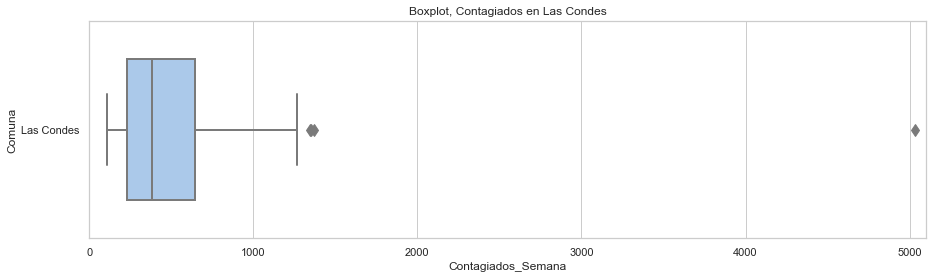

In [75]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x=datos_LC["Contagiados_Semana"], y=datos_LC["Comuna"], palette = "pastel",
            linewidth=2, fliersize=9, width=0.65)
plt.title('Boxplot, Contagiados en Las Condes')
plt.xlim(0,5100)

#Creo un boxplot con sus respectivos filtros para poder evidenciar los diferentes cuartiles y los outliers 
#Se evidencia un outlier superior a 5000 lo que podría considerarse "anormal" dentro de los mismos, lo que se puede asumir como un error en la muestra
#Cabe destacar que este valor podría causar cesgos en el estudio

Text(0.5, 1.0, 'Casos en Las Condes')

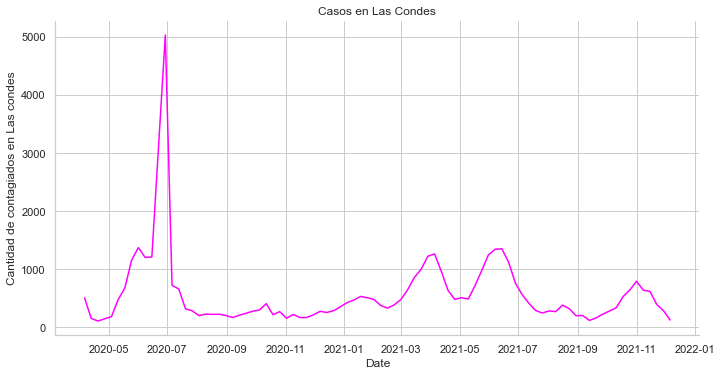

In [26]:
sns.relplot(data = datos_LC, x = "Fecha", y ='Contagiados_Semana', 
            height=5, aspect=2, color="magenta",
            kind="line").set_axis_labels('Date', 'Cantidad de contagiados en Las condes')
plt.title('Casos en Las Condes')

#De la misma forma creo un gráfico del tipo "relplot" que lo denota de forma más extendida 

## <li type="disc"> Lista Outliers: </li>

In [27]:
Posibles_outliers=datos_LC[datos_LC["Contagiados_Semana"]>1300]
Posibles_outliers 
#En base a los outliers encontrados, se tabulan los superiores a 1300, 
#que fueron los valores que superaban al cuarto cuartil y se genera la lista

,Contagiados,Contagiados_Semana,Comuna
Fecha,,,
2020-06-01,4577.0,1373.0,Las Condes
2020-06-29,9225.0,5033.0,Las Condes
2021-06-07,32837.0,1345.0,Las Condes
2021-06-14,34189.0,1352.0,Las Condes


Se evidencia que los dias que mas hubo casos en las condes es el 29 de junio del 2020